In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [3]:

# Load dataset
df = pd.read_csv("./ML471_S4_Datafile_Concept.csv")

# Convert Datetime column to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Select consumption series
ts = df['Consumption']

# Remove missing values
ts = ts.dropna()


In [4]:

hw_model = ExponentialSmoothing(
    ts,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)

hw_fit = hw_model.fit()

smoothed_series = hw_fit.fittedvalues


d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


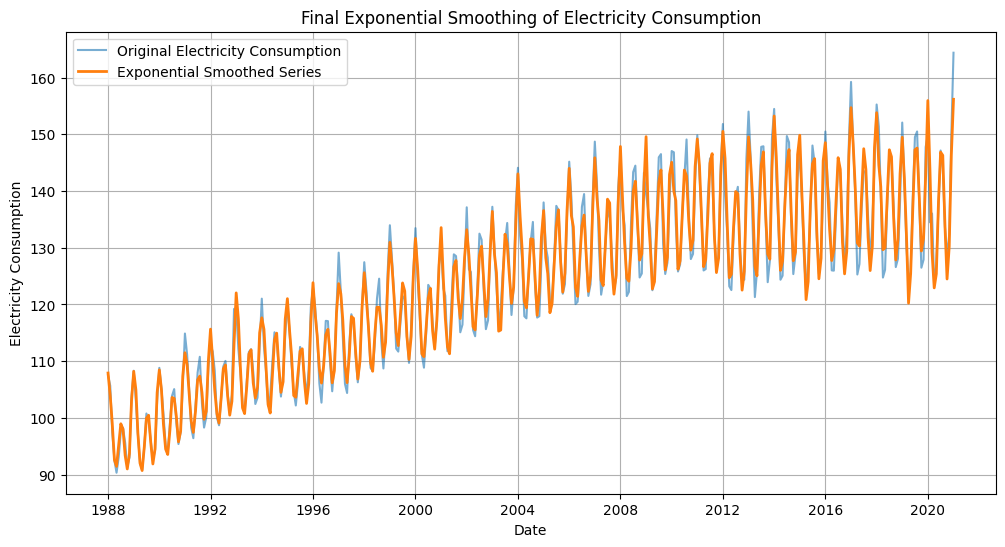

In [5]:

plt.figure(figsize=(12, 6))

plt.plot(ts, label="Original Electricity Consumption", alpha=0.6)
plt.plot(smoothed_series, label="Exponential Smoothed Series", linewidth=2)

plt.title("Final Exponential Smoothing of Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption")
plt.legend()
plt.grid(True)

plt.show()